In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout, experimental
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(208, 208, 3)),  # свёрточный слой
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Flatten(),  # нормализация значения после свёрточной слоев
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключения 80 процентов нейронов
    Dense(4, activation='sigmoid'),
])

In [3]:
pwd

'C:\\Users\\Matvey\\Проект\\Project'

In [20]:
%cd ../..

C:\Users\Matvey\Проект\Project


In [4]:
%cd DataSet_cars_train/train

C:\Users\Matvey\Проект\Project\DataSet_cars_train\train


In [6]:
image_size=(208, 208)
batch_size= 32

In [ ]:
def data(x,y):
    x = []
    y = []
    df = pd.read_csv('_annotations.csv') 
    for i in range(len(df)):
    image_id = df['filename'][i]
    xMin_coord = df['xmin'][i] // 2
    yMin_coord = df['ymin'][i] // 2
    xMax_coord = df['xmax'][i] // 2
    yMax_coord = df['ymax'][i] // 2
    image_id = keras.utils.load_img(image_id, target_size=image_size)
    coordinates = [xMin_coord, yMin_coord, xMax_coord, yMax_coord]
    x.append(np.expand_dims(image_id, axis = 0))
    y.append(coordinates)
    return x,y

In [7]:
x_train = []
y_train = []
df = pd.read_csv('_annotations.csv') 
for i in range(len(df)):
    image_id = df['filename'][i]
    xMin_coord = df['xmin'][i] // 2
    yMin_coord = df['ymin'][i] // 2
    xMax_coord = df['xmax'][i] // 2
    yMax_coord = df['ymax'][i] // 2
    image_id = keras.utils.load_img(image_id, target_size=image_size)
    coordinates = [xMin_coord, yMin_coord, xMax_coord, yMax_coord]
    x_train.append(np.expand_dims(image_id, axis = 0))
    y_train.append(coordinates)

In [8]:
%cd ../..
%cd DataSet_cars_valid/valid

C:\Users\Matvey\Проект\Project
C:\Users\Matvey\Проект\Project\DataSet_cars_valid\valid


In [9]:
x_valid = []
y_valid = []
df = pd.read_csv('_annotations.csv') 
for i in range(len(df)):
    image_id = df['filename'][i]
    xMin_coord = df['xmin'][i] // 2
    yMin_coord = df['ymin'][i] // 2
    xMax_coord = df['xmax'][i] // 2
    yMax_coord = df['ymax'][i] // 2
    image_id = keras.utils.load_img(image_id, target_size = image_size)
    coordinates = [xMin_coord, yMin_coord ,xMax_coord, yMax_coord]
    x_valid.append(np.expand_dims(image_id, axis = 0))
    y_valid.append(coordinates)

In [15]:
x_train = np.asarray(x_train) / 255
y_train = np.asarray(y_train) / 255

In [16]:
x_valid = np.asarray(x_valid) / 255
y_valid = np.asarray(y_valid) / 255

In [11]:
x_valid

[array([[[[  6,  10,   9],
          [ 24,  37,  45],
          [ 20,  38,  52],
          ...,
          [ 98,  80,  68],
          [ 96,  78,  66],
          [ 94,  76,  62]],
 
         [[  4,   8,   7],
          [ 24,  34,  43],
          [ 32,  48,  63],
          ...,
          [100,  81,  67],
          [ 99,  80,  66],
          [ 98,  79,  65]],
 
         [[  2,   4,   3],
          [ 43,  53,  62],
          [ 61,  77,  92],
          ...,
          [100,  78,  65],
          [100,  78,  64],
          [100,  78,  64]],
 
         ...,
 
         [[ 81,  66,  43],
          [ 79,  64,  43],
          [ 90,  73,  57],
          ...,
          [107,  91,  76],
          [ 98,  82,  67],
          [100,  84,  69]],
 
         [[ 86,  74,  50],
          [ 87,  72,  51],
          [ 95,  79,  63],
          ...,
          [110,  94,  79],
          [103,  87,  72],
          [100,  84,  69]],
 
         [[ 88,  76,  52],
          [ 89,  77,  55],
          [ 96,  80,  64],
   

In [17]:
y_train

array([[0.08627451, 0.45882353, 0.53333333, 0.81176471],
       [0.        , 0.03921569, 0.81176471, 0.81176471],
       [0.04705882, 0.20392157, 0.78431373, 0.79607843],
       ...,
       [0.        , 0.04313725, 0.81176471, 0.71764706],
       [0.        , 0.09411765, 0.81176471, 0.7254902 ],
       [0.        , 0.05882353, 0.81176471, 0.81176471]])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [10]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

In [42]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [39]:
model

In [40]:
train_dataset

<TensorSliceDataset shapes: ((1, 200, 200, 3), (2, 2)), types: (tf.uint8, tf.int32)>

In [41]:
val_dataset

<TensorSliceDataset shapes: ((1, 200, 200, 3), (2, 2)), types: (tf.uint8, tf.int32)>

In [26]:
batch_size

32

In [3]:
his = model.fit(train_dataset, validation_data = val_dataset, epochs=10, batch_size=32)

NameError: name 'train_dataset' is not defined

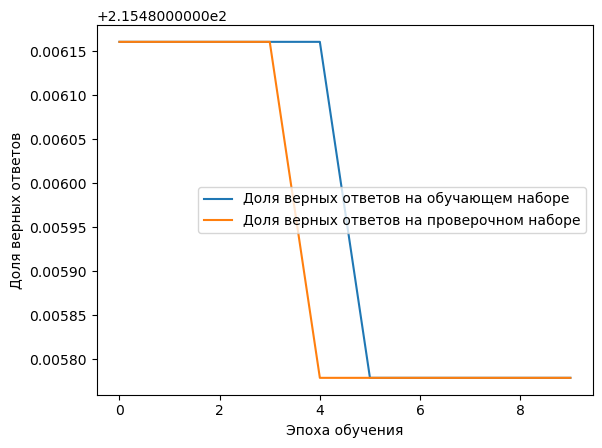

In [144]:
plt.plot(his.history['mae'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(his.history['val_mae'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

In [ ]:
model.save('mae.h5')